# Counting each class per old and new datasets

03-11-2023

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

sklearn.set_config(transform_output="pandas")

import tensorflow as tf
from tensorflow import keras

# tf.debugging.set_log_device_placement(True)

keras.backend.clear_session()
keras.utils.set_random_seed(2)

2023-11-20 15:08:22.795091: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-20 15:08:22.833007: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 15:08:22.833032: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 15:08:22.833056: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 15:08:22.840309: I tensorflow/core/platform/cpu_feature_g

In [18]:
def select_samples(name, n=None, sample_names_to_check=None):
    index_list = []

    for index, sample_description in enumerate(sample_names_to_check):
        if name in sample_description:
            print(name)
            index_list.append(index)

    return index_list[:n]


def to_normalize_rpm(data):
    # Normalise the gene counts to the library size
    data = data.apply(lambda x: (x / (x.sum() if x.sum() != 0 else 1)) * 1000000)
    return data

In [3]:
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 200)
pd.set_option("display.precision", 5)
pd.set_option("display.max_seq_items", 50)

In [4]:
file_name = (
    "/home/t.afanasyeva/MATseq/notebooks/gene_counts_exp_B34_B44_B51_B61_B64.csv"
)
data = pd.read_csv(file_name)

In [5]:
data.shape

(129, 19993)

In [6]:
file_name = (
    "/home/t.afanasyeva/MATseq/notebooks/gene_counts_exp_B34_B44_B51_B61_B64.csv"
)
data_ = pd.read_csv(file_name, index_col="sample")
data_.sum(axis=1).sort_values()

sample
BA028_IMDM_03           309502.0
BA046_Mur_15            769105.0
BA042_SCG_10            898915.0
BA046_Mur_16           1140651.0
BA046_CRX-527_12       1151920.0
BA046_CRX-527_11       1226167.0
BA029_CL-307_23        1291476.0
BA042_TL8-506_15       1333883.0
BA042_Fla-PA_18        1389011.0
BA046_MPLA_6           1585474.0
BA042_SCG_12           1664846.0
BA042_Fla-PA_17        1719051.0
BA042_AH1252_23        1731966.0
BA042_TL8-506_13       1737281.0
BA042_SCG_9            1908532.0
BA042_TL8-506_14       1958060.0
BA046_CRX-527_10       1994225.0
BA042_AH1252_22        2054736.0
BA033_FSL-1_24         2095048.0
BA029_LTA_19           2230583.0
BA029_LTA_20           2359758.0
BA028_R848_15          2360018.0
BA028_IMDM_02          2543049.0
BA029_PGN_14           2594590.0
BA028_LPS_05           2697137.0
BA028_Pam3_11          2699023.0
BA042_LPS_8            2727146.0
BA042_Fla-PA_20        2794099.0
BA028_Fla-St_21        2835842.0
BA028_Pam3_09          2906298.0
BA0

In [7]:
data = data.loc[data["sample"] != "BA028_IMDM_03"]

In [12]:
labels = data["sample"]

In [15]:
features = data.drop("sample", axis=1)

In [19]:
data_norm = to_normalize_rpm(features)

In [21]:
df = pd.Series({"labels": labels, "IL6": data_norm["IL6"].round()})

In [ ]:
data = data.loc[data["sample"] != "BA029_IMDM_03"]

In [ ]:
data.index = data["sample"]

In [ ]:
data.drop(columns="sample")

,HUNK,KLHL8,ZNF576,UGT1A5,FCF1,SLC2A7,FABP12,TAF12,GLRX,LAMB3,...,ASIC2,TSN,EVA1A,NFATC1,PORCN,GALNT17,DEPDC4,REL,RPL23,AHSP
sample,,,,,,,,,,,,,,,,,,,,,
BA028_Fla-St_21,0.0,47.0,23.0,0.0,148.0,0.0,0.0,62.0,73.0,112.0,...,0.0,193.0,0.0,192.0,30.0,0.0,0.0,1277.0,1819.0,0.0
BA028_Fla-St_22,0.0,44.0,21.0,0.0,173.0,0.0,0.0,68.0,48.0,133.0,...,0.0,151.0,0.0,213.0,16.0,0.0,0.0,1440.0,1989.0,0.0
BA028_IMDM_01,0.0,45.0,22.0,0.0,205.0,0.0,0.0,50.0,36.0,124.0,...,0.0,195.0,0.0,210.0,18.0,0.0,0.0,1183.0,2006.0,0.0
BA028_IMDM_02,0.0,37.0,24.0,0.0,110.0,0.0,0.0,33.0,30.0,88.0,...,0.0,206.0,0.0,201.0,6.0,0.0,0.0,1137.0,1989.0,0.0
BA028_LPS_05,0.0,55.0,20.0,0.0,131.0,0.0,0.0,35.0,46.0,154.0,...,0.0,195.0,0.0,203.0,10.0,0.0,0.0,1000.0,1577.0,0.0
BA028_LPS_06,0.0,114.0,49.0,0.0,248.0,0.0,0.0,96.0,117.0,298.0,...,0.0,402.0,0.0,468.0,33.0,0.0,0.0,2778.0,4170.0,2.0
BA028_LPS_07,0.0,91.0,41.0,0.0,221.0,0.0,0.0,77.0,75.0,225.0,...,0.0,308.0,0.0,311.0,26.0,0.0,0.0,1573.0,2971.0,1.0
BA028_Pam3_09,0.0,55.0,28.0,0.0,152.0,0.0,0.0,32.0,60.0,135.0,...,0.0,204.0,0.0,234.0,10.0,0.0,0.0,1350.0,2014.0,1.0
BA028_Pam3_10,0.0,142.0,33.0,0.0,292.0,0.0,0.0,83.0,115.0,329.0,...,0.0,430.0,0.0,485.0,23.0,0.0,1.0,2608.0,4372.0,0.0


In [ ]:
data.to_csv("gene_counts_7128_old_all_filtered.csv", index=False)

In [ ]:
included_sample_names = [
    "_LPS_",
    "_IMDM_",
    "_Pam3_",
    "_PGN_",
    "_LTA_",
    "_R848_",
    "_Fla-PA_",
    "_CL-307_",
    "_CRX-527_",
]

In [ ]:
samples = data["sample"]

index_list = []

for name in included_sample_names:
    index_list.extend(select_samples(name, n=127, samples=samples, shuffle=False))

_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_PGN_
_PGN_
_PGN_
_PGN_
_PGN_
_LTA_
_LTA_
_LTA_
_R848_
_R848_
_R848_
_R848_
_R848_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_CL-307_
_CL-307_
_CL-307_
_CL-307_
_CL-307_
_CL-307_
_CRX-527_
_CRX-527_
_CRX-527_
_CRX-527_
_CRX-527_
_CRX-527_
_CRX-527_


In [ ]:
data_for_ml = data.iloc[index_list]

In [ ]:
data_for_ml.shape

(64, 19993)

In [ ]:
data_for_ml["sample"] = data_for_ml["sample"].apply(lambda name: name.split("_", 2)[1])

In [ ]:
data_for_ml.reset_index(drop=True)

,sample,HUNK,KLHL8,ZNF576,UGT1A5,FCF1,SLC2A7,FABP12,TAF12,GLRX,...,ASIC2,TSN,EVA1A,NFATC1,PORCN,GALNT17,DEPDC4,REL,RPL23,AHSP
5,LPS,0.0,55.0,20.0,0.0,131.0,0.0,0.0,35.0,46.0,...,0.0,195.0,0.0,203.0,10.0,0.0,0.0,1000.0,1577.0,0.0
6,LPS,0.0,114.0,49.0,0.0,248.0,0.0,0.0,96.0,117.0,...,0.0,402.0,0.0,468.0,33.0,0.0,0.0,2778.0,4170.0,2.0
7,LPS,0.0,91.0,41.0,0.0,221.0,0.0,0.0,77.0,75.0,...,0.0,308.0,0.0,311.0,26.0,0.0,0.0,1573.0,2971.0,1.0
20,LPS,0.0,153.0,40.0,0.0,299.0,0.0,0.0,115.0,108.0,...,0.0,427.0,0.0,432.0,34.0,0.0,0.0,3004.0,3563.0,0.0
21,LPS,0.0,146.0,50.0,0.0,243.0,0.0,0.0,67.0,110.0,...,0.0,355.0,0.0,380.0,39.0,0.0,0.0,2784.0,2734.0,0.0
22,LPS,0.0,139.0,52.0,0.0,303.0,0.0,0.0,97.0,110.0,...,0.0,393.0,0.0,492.0,32.0,0.0,0.0,3464.0,3584.0,1.0
51,LPS,0.0,72.0,19.0,0.0,159.0,0.0,0.0,44.0,59.0,...,0.0,199.0,0.0,278.0,12.0,0.0,0.0,1797.0,1941.0,0.0
52,LPS,0.0,60.0,21.0,0.0,165.0,0.0,0.0,48.0,69.0,...,0.0,152.0,0.0,266.0,16.0,0.0,0.0,1674.0,1655.0,0.0
53,LPS,0.0,34.0,18.0,0.0,127.0,0.0,0.0,44.0,59.0,...,0.0,143.0,0.0,218.0,11.0,0.0,0.0,1475.0,1445.0,0.0
82,LPS,1.0,208.0,83.0,0.0,398.0,0.0,0.0,141.0,154.0,...,0.0,610.0,0.0,843.0,65.0,0.0,0.0,5237.0,4844.0,1.0


<Axes: title={'center': 'Count (target)'}, xlabel='sample'>

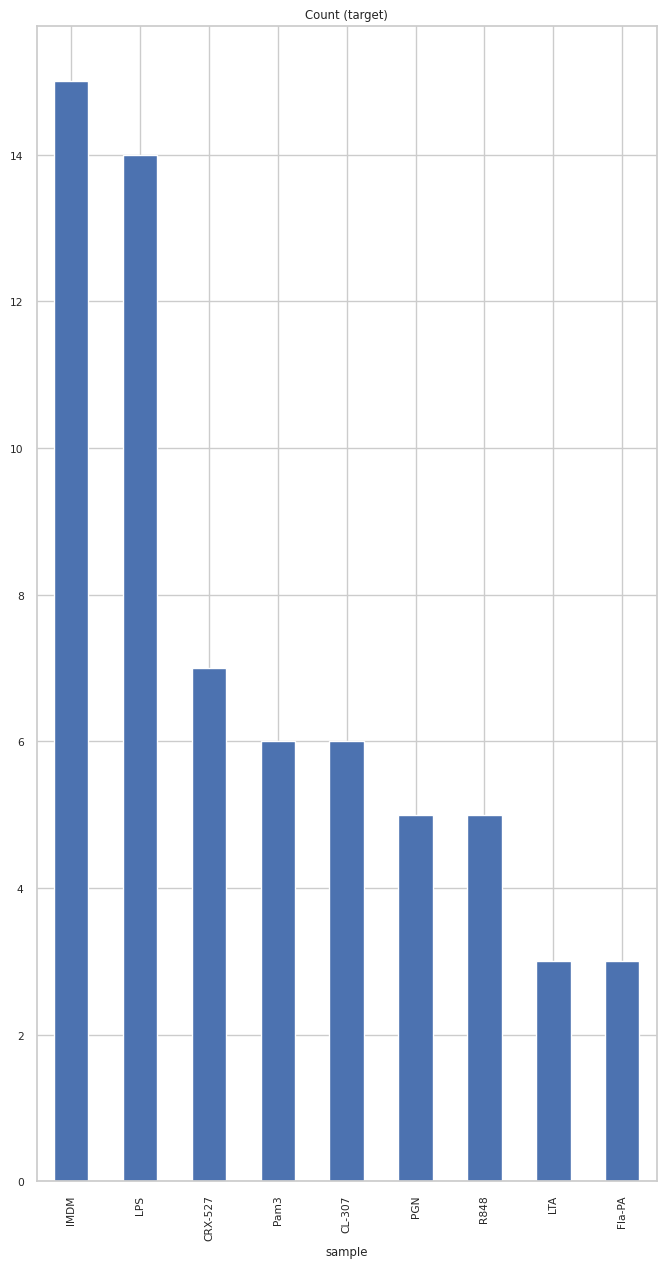

In [ ]:
data_for_ml["sample"].value_counts().plot(kind="bar", title="Count (target)")

In [ ]:
data_for_ml.to_csv("gene_counts_7128_old_64_train.csv", index=False)

In [ ]:
data_ = pd.read_csv(file_name, index_col="sample")
data_.sum(axis=1).sort_values()

sample
MD218_7115_R848_3          847095.0
MD215_7115_Pam3_2          979427.0
MD211_7100_R848_1          988760.0
MD218_7121_R848_3          999888.0
MD214_7121_R848_1         1128781.0
MD211_7100_R848_2         1149286.0
MD212_7086_IMDM_2         1243565.0
MD214_7121_LPS_1          1282751.0
MD214_7121_R848_3         1287657.0
MD214_7121_Pam3_3         1395767.0
MD212_7086_Pam3_2         1426226.0
MD216_7100_R848-low_1     1436338.0
MD212_7086_Pam3_1         1437563.0
MD218_7121_R848_1         1466585.0
MD221_7128_LTA-BS_2       1480259.0
MD214_7121_LPS_3          1535097.0
MD214_7121_R848_2         1560020.0
MD221_7128_LTA-BS_3       1579224.0
MD212_7086_R848_1         1586939.0
MD211_7100_R848_3         1592552.0
MD218_7115_R848_1         1688862.0
MD221_7128_Pam2_2         1700714.0
MD215_7115_Pam3_3         1770036.0
MD214_7121_IMDM_1         1777737.0
MD212_7086_R848_2         1809142.0
MD221_7128_IMDM_3         1841828.0
MD211_7100_LPS_3          1852769.0
MD218_7115_R848_2    

In [ ]:
file_name = "/home/t.afanasyeva/MATseq/notebooks/gene_counts_106_samples.csv"
data = pd.read_csv(file_name)
data = data.loc[data.index != "MD215_7115_IMDM_3"]  # Drop for low concentration

In [ ]:
labels = data["sample"]
features = data.drop("sample", axis=1)

In [ ]:
data_norm = to_normalize_rpm(features)
df = pd.DataFrame()
df["sample"] = labels
il6 = data_norm["IL6"].round()
df["IL6"] = il6
df.head(128)

,sample,IL6
0,MD211_7100_IMDM_1,100.0
1,MD211_7100_IMDM_2,66.0
2,MD211_7100_IMDM_3,83.0
3,MD211_7100_LPS_1,373.0
4,MD211_7100_LPS_2,538.0
5,MD211_7100_LPS_3,252.0
6,MD211_7100_Pam3_1,1829.0
7,MD211_7100_Pam3_2,2233.0
8,MD211_7100_Pam3_3,1988.0
9,MD211_7100_R848_1,3927.0


<Axes: xlabel='IL6', ylabel='sample'>

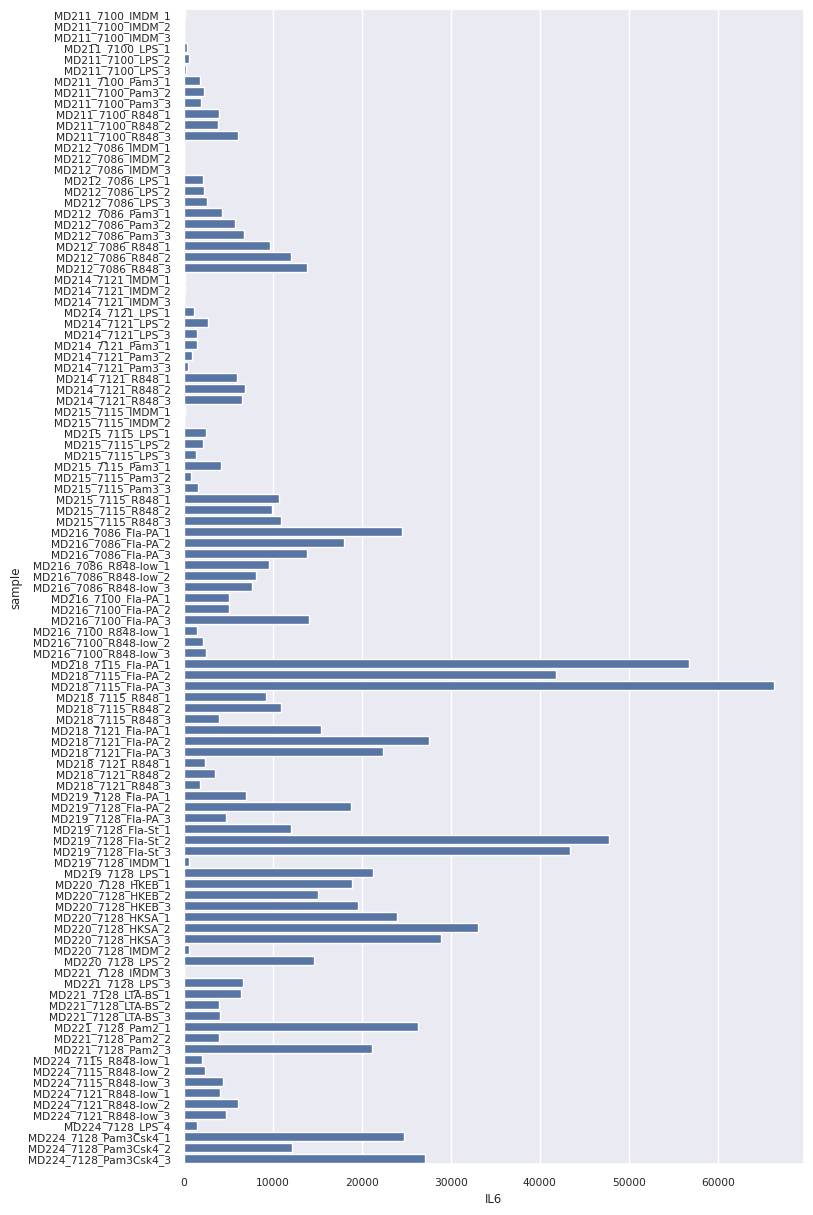

In [ ]:
sns.set_theme(rc={"figure.figsize": (8, 15)}, font_scale=0.7)
sns.barplot(y=df["sample"], x=df["IL6"])

In [ ]:
def get_classes_batches(data):
    classes = []
    batches = []
    for name in data:
        parts = name.split("_")
        if name.startswith("BA"):
            batches.append("7128_old")
            classes.append(parts[-2])
        else:
            classes.append(parts[-2])
            batches.append(parts[1])

    return classes, batches

In [ ]:
classes, batches = get_classes_batches(labels)

In [ ]:
data["sample"] = classes

In [ ]:
data

,sample,HUNK,KLHL8,ZNF576,UGT1A5,FCF1,SLC2A7,FABP12,TAF12,GLRX,...,ASIC2,TSN,EVA1A,NFATC1,PORCN,GALNT17,DEPDC4,REL,RPL23,AHSP
0,IMDM,0.0,59.0,34.0,0.0,95.0,0.0,0.0,63.0,42.0,...,0.0,255.0,0.0,203.0,9.0,0.0,0.0,1042.0,1903.0,0.0
1,IMDM,0.0,84.0,13.0,0.0,204.0,0.0,0.0,31.0,24.0,...,0.0,128.0,0.0,141.0,13.0,0.0,0.0,1086.0,1540.0,1.0
2,IMDM,0.0,33.0,15.0,0.0,121.0,0.0,0.0,47.0,26.0,...,0.0,169.0,0.0,138.0,9.0,0.0,0.0,800.0,1218.0,1.0
3,LPS,0.0,55.0,41.0,0.0,135.0,0.0,0.0,53.0,46.0,...,0.0,143.0,0.0,181.0,17.0,0.0,0.0,870.0,1193.0,4.0
4,LPS,0.0,75.0,45.0,0.0,196.0,0.0,0.0,49.0,69.0,...,0.0,317.0,0.0,233.0,17.0,0.0,0.0,1341.0,2254.0,4.0
5,LPS,0.0,43.0,17.0,0.0,81.0,0.0,0.0,36.0,29.0,...,0.0,177.0,0.0,104.0,9.0,0.0,0.0,875.0,1173.0,2.0
6,Pam3,0.0,69.0,23.0,0.0,75.0,0.0,0.0,18.0,32.0,...,0.0,147.0,0.0,162.0,6.0,0.0,0.0,707.0,1121.0,0.0
7,Pam3,0.0,58.0,16.0,0.0,132.0,0.0,0.0,41.0,51.0,...,0.0,157.0,0.0,164.0,10.0,0.0,0.0,1317.0,1554.0,2.0
8,Pam3,0.0,61.0,37.0,0.0,116.0,0.0,0.0,37.0,59.0,...,0.0,215.0,0.0,228.0,17.0,0.0,0.0,1188.0,1752.0,1.0
9,R848,0.0,24.0,8.0,0.0,61.0,0.0,0.0,18.0,8.0,...,0.0,59.0,0.0,62.0,0.0,0.0,0.0,348.0,442.0,0.0


In [ ]:
data["sample"].loc[data["sample"] == "LTA-BS"] = "LTA"

/tmp/ipykernel_3023919/1137771771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sample"].loc[data["sample"] == "LTA-BS"] = "LTA"


In [ ]:
data.to_csv("gene_counts_105_test_set.csv", index=False)

In [ ]:
data["class"].value_counts()
# .plot(kind="bar", title="Count (target)")

class
R848        18
LPS         16
Fla-PA      15
IMDM        14
Pam3        12
R848-low    12
Fla-St       3
HKEB         3
HKSA         3
LTA-BS       3
Pam2         3
Pam3Csk4     3
Name: count, dtype: int64

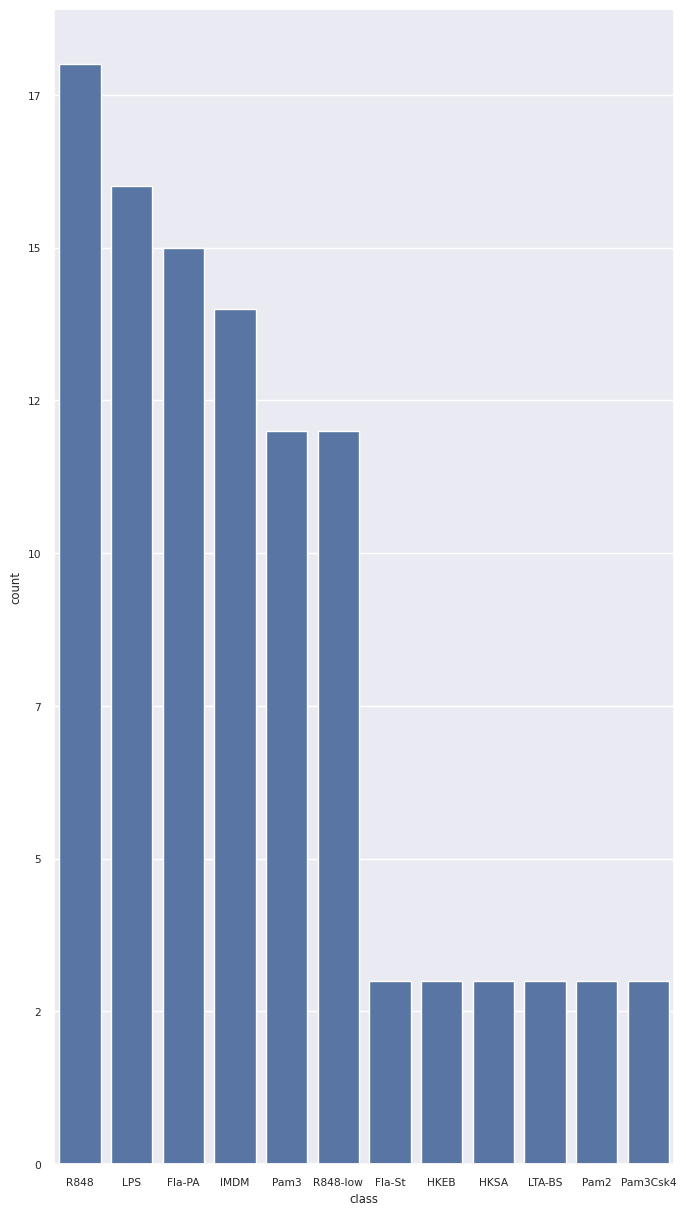

In [ ]:
from matplotlib.ticker import FuncFormatter

ax = sns.barplot(data["class"].value_counts())
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

In [ ]:
def get_classes_batches(data):
    classes = []
    batches = []
    for name in data.index:
        parts = name.split("_")
        if name.startswith("BA"):
            batches.append("7128_old")
            classes.append(parts[-2])
        else:
            classes.append(parts[-2])
            batches.append(parts[1])

    return classes, batches


file_name = "/home/t.afanasyeva/MATseq/notebooks/gene_counts_106_samples.csv"
data = pd.read_csv(file_name, index_col="sample")
data = data.loc[data.index != "MD215_7115_IMDM_3"]  # Drop for low concentration

file_name = (
    "/home/t.afanasyeva/MATseq/notebooks/gene_counts_exp_B34_B44_B51_B61_B64.csv"
)
data_ = pd.read_csv(file_name, index_col="sample")
data_ = data_.loc[data_.index != "BA028_IMDM_03"]
data_ = data_.loc[data_.index != "BA029_IMDM_03"]

combined_data = pd.concat([data, data_])
classes, _ = get_classes_batches(combined_data)

In [ ]:
combined_data.shape

(232, 19992)

In [ ]:
combined_data["class"] = classes

,HUNK,KLHL8,ZNF576,UGT1A5,FCF1,SLC2A7,FABP12,TAF12,GLRX,LAMB3,...,TSN,EVA1A,NFATC1,PORCN,GALNT17,DEPDC4,REL,RPL23,AHSP,class
sample,,,,,,,,,,,,,,,,,,,,,
MD211_7100_IMDM_1,0.0,59.0,34.0,0.0,95.0,0.0,0.0,63.0,42.0,166.0,...,255.0,0.0,203.0,9.0,0.0,0.0,1042.0,1903.0,0.0,IMDM
MD211_7100_IMDM_2,0.0,84.0,13.0,0.0,204.0,0.0,0.0,31.0,24.0,107.0,...,128.0,0.0,141.0,13.0,0.0,0.0,1086.0,1540.0,1.0,IMDM
MD211_7100_IMDM_3,0.0,33.0,15.0,0.0,121.0,0.0,0.0,47.0,26.0,75.0,...,169.0,0.0,138.0,9.0,0.0,0.0,800.0,1218.0,1.0,IMDM
MD211_7100_LPS_1,0.0,55.0,41.0,0.0,135.0,0.0,0.0,53.0,46.0,131.0,...,143.0,0.0,181.0,17.0,0.0,0.0,870.0,1193.0,4.0,LPS
MD211_7100_LPS_2,0.0,75.0,45.0,0.0,196.0,0.0,0.0,49.0,69.0,177.0,...,317.0,0.0,233.0,17.0,0.0,0.0,1341.0,2254.0,4.0,LPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BA063_Pam3_17,0.0,277.0,95.0,0.0,532.0,0.0,0.0,157.0,184.0,760.0,...,802.0,0.0,909.0,60.0,0.0,1.0,5576.0,6945.0,1.0,Pam3
BA063_Pam3_18,2.0,274.0,100.0,0.0,552.0,0.0,0.0,172.0,180.0,727.0,...,790.0,0.0,992.0,52.0,0.0,2.0,6483.0,7529.0,2.0,Pam3
BA063_TL8-506_10,0.0,223.0,70.0,0.0,529.0,0.0,0.0,153.0,174.0,539.0,...,786.0,0.0,781.0,65.0,0.0,0.0,5673.0,6468.0,1.0,TL8-506


In [ ]:
combined_data["class"].value_counts()
# .plot(kind="bar", title="Count (target)")

class
LPS          30
IMDM         29
R848         23
Pam3         18
Fla-PA       18
R848-low     12
Fla-St        8
CRX-527       7
Mur           7
CL-307        6
TL8-506       6
MPLA          6
FSL-1         6
SCG           5
PGN           5
LPS-PGN       4
LPS-SM        3
Pam3-PGN      3
LPS-R848      3
Fab           3
AH1397        3
AH1405        3
HKEB          3
AH1252        3
LTA           3
HKSA          3
LTA-BS        3
Pam2          3
Pam3Csk4      3
Pam3-R848     3
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'LPS'),
  Text(1, 0, 'IMDM'),
  Text(2, 0, 'R848'),
  Text(3, 0, 'Pam3'),
  Text(4, 0, 'Fla-PA'),
  Text(5, 0, 'R848-low'),
  Text(6, 0, 'Fla-St'),
  Text(7, 0, 'CRX-527'),
  Text(8, 0, 'Mur'),
  Text(9, 0, 'CL-307'),
  Text(10, 0, 'TL8-506'),
  Text(11, 0, 'MPLA'),
  Text(12, 0, 'FSL-1'),
  Text(13, 0, 'SCG'),
  Text(14, 0, 'PGN'),
  Text(15, 0, 'LPS-PGN'),
  Text(16, 0, 'LPS-SM'),
  Text(17, 0, 'Pam3-PGN'),
  Text(18, 0, 'LPS-R848'),
  Text(19, 0, 'Fab'),
  Text(20, 0, 'AH1397'),
  Text(21, 0, 'AH1405'),
  Text(22, 0, 'HKEB'),
  Text(23, 0, 'AH1252'),
  Text(24, 0, 'LTA'),
  Text(25, 0, 'HKSA'),
  Text(26, 0, 'LTA-BS'),
  Text(27, 0, 'Pam2'),
  Text(28, 0, 'Pam3Csk4'),
  Text(29, 0, 'Pam3-R848')])

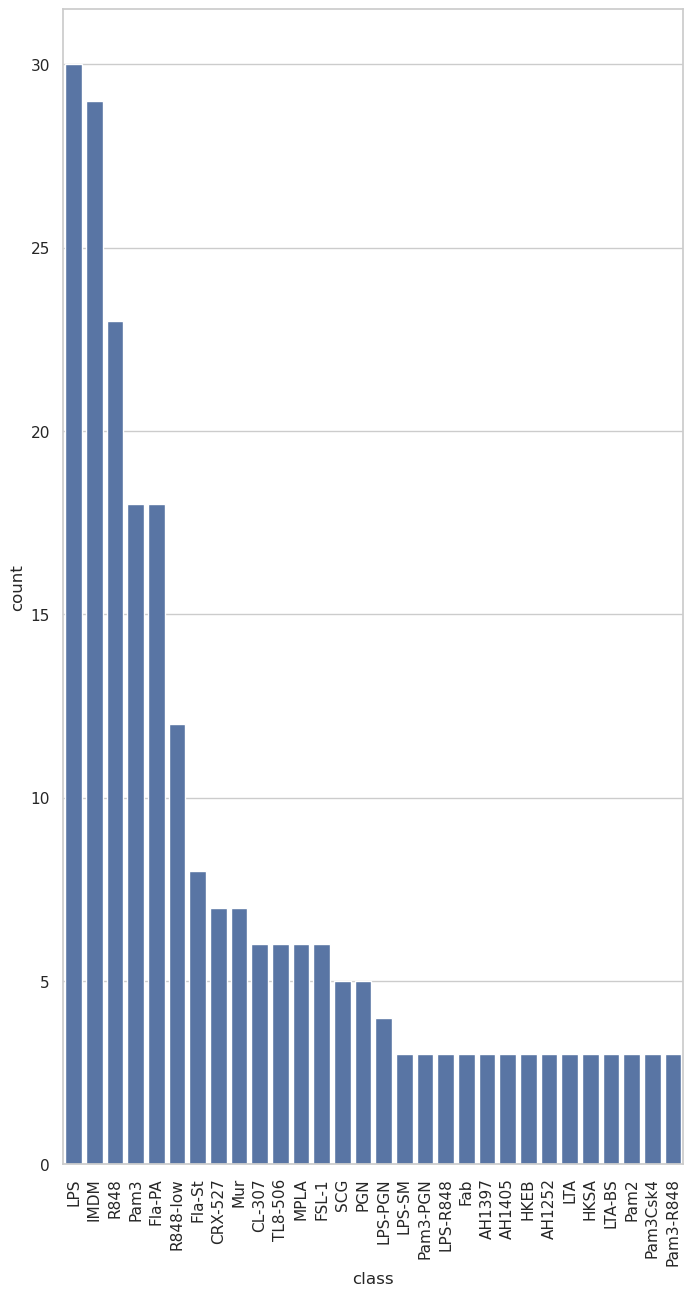

In [ ]:
from matplotlib.ticker import FuncFormatter

sns.set_style(style="whitegrid", rc={"xtick.labelsize": 6, "ytick.labelsize": 7})
ax = sns.barplot(combined_data["class"].value_counts())
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
ax.set_xticks(range(len(set(classes))))
plt.xticks(rotation="vertical")

In [ ]:
samples = combined_data["class"]
samples

sample
MD211_7100_IMDM_1       IMDM
MD211_7100_IMDM_2       IMDM
MD211_7100_IMDM_3       IMDM
MD211_7100_LPS_1         LPS
MD211_7100_LPS_2         LPS
                      ...   
BA063_Pam3_17           Pam3
BA063_Pam3_18           Pam3
BA063_TL8-506_10     TL8-506
BA063_TL8-506_11     TL8-506
BA063_TL8-506_12     TL8-506
Name: class, Length: 232, dtype: object

In [ ]:
included_sample_names_no_undr = [
    "_CL-307_",
    "_CRX-527_",
    "_Fla-PA_",
    "_Fla-St_",
    "_IMDM_",
    "_LPS_",
    "_LTA_",
    "_LTA-BS",  # This class is written differently in the new setdataset
    "_PGN_",
    "_Pam3_",
    "_R848_",
]

In [ ]:
samples = combined_data.index
index_list = []

for name in included_sample_names_no_undr:
    index_list.extend(
        select_samples(name, n=500, sample_names_to_check=samples, shuffle=False)
    )

_CL-307_
_CL-307_
_CL-307_
_CL-307_
_CL-307_
_CL-307_
_CRX-527_
_CRX-527_
_CRX-527_
_CRX-527_
_CRX-527_
_CRX-527_
_CRX-527_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-PA_
_Fla-St_
_Fla-St_
_Fla-St_
_Fla-St_
_Fla-St_
_Fla-St_
_Fla-St_
_Fla-St_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_IMDM_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LPS_
_LTA_
_LTA_
_LTA_
_LTA-BS
_LTA-BS
_LTA-BS
_PGN_
_PGN_
_PGN_
_PGN_
_PGN_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_Pam3_
_R848_
_R848_
_R848_
_R848_
_R848_
_R848_
_R848_
_R848_
_R848

In [ ]:
data_for_ml_all = combined_data.iloc[index_list]
len(index_list)

150

In [ ]:
combined_data.head(200)

,HUNK,KLHL8,ZNF576,UGT1A5,FCF1,SLC2A7,FABP12,TAF12,GLRX,LAMB3,...,TSN,EVA1A,NFATC1,PORCN,GALNT17,DEPDC4,REL,RPL23,AHSP,class
sample,,,,,,,,,,,,,,,,,,,,,
MD211_7100_IMDM_1,0.0,59.0,34.0,0.0,95.0,0.0,0.0,63.0,42.0,166.0,...,255.0,0.0,203.0,9.0,0.0,0.0,1042.0,1903.0,0.0,IMDM
MD211_7100_IMDM_2,0.0,84.0,13.0,0.0,204.0,0.0,0.0,31.0,24.0,107.0,...,128.0,0.0,141.0,13.0,0.0,0.0,1086.0,1540.0,1.0,IMDM
MD211_7100_IMDM_3,0.0,33.0,15.0,0.0,121.0,0.0,0.0,47.0,26.0,75.0,...,169.0,0.0,138.0,9.0,0.0,0.0,800.0,1218.0,1.0,IMDM
MD211_7100_LPS_1,0.0,55.0,41.0,0.0,135.0,0.0,0.0,53.0,46.0,131.0,...,143.0,0.0,181.0,17.0,0.0,0.0,870.0,1193.0,4.0,LPS
MD211_7100_LPS_2,0.0,75.0,45.0,0.0,196.0,0.0,0.0,49.0,69.0,177.0,...,317.0,0.0,233.0,17.0,0.0,0.0,1341.0,2254.0,4.0,LPS
MD211_7100_LPS_3,0.0,43.0,17.0,0.0,81.0,0.0,0.0,36.0,29.0,67.0,...,177.0,0.0,104.0,9.0,0.0,0.0,875.0,1173.0,2.0,LPS
MD211_7100_Pam3_1,0.0,69.0,23.0,0.0,75.0,0.0,0.0,18.0,32.0,73.0,...,147.0,0.0,162.0,6.0,0.0,0.0,707.0,1121.0,0.0,Pam3
MD211_7100_Pam3_2,0.0,58.0,16.0,0.0,132.0,0.0,0.0,41.0,51.0,88.0,...,157.0,0.0,164.0,10.0,0.0,0.0,1317.0,1554.0,2.0,Pam3
MD211_7100_Pam3_3,0.0,61.0,37.0,0.0,116.0,0.0,0.0,37.0,59.0,147.0,...,215.0,0.0,228.0,17.0,0.0,0.0,1188.0,1752.0,1.0,Pam3


In [ ]:
data_for_ml_all.to_csv("gene_counts_all_filtered.csv", index=True)

In [ ]:
data_for_ml_all["class"].unique()

array(['CL-307', 'CRX-527', 'Fla-PA', 'Fla-St', 'IMDM', 'LPS', 'LTA',
       'PGN', 'Pam3', 'R848'], dtype=object)

In [ ]:
data_for_ml_all["class"].loc[data_for_ml_all["class"] == "LTA-BS"] = "LTA"

/tmp/ipykernel_3023919/1653161137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_ml_all['class'].loc[data_for_ml_all["class"] == "LTA-BS"] = "LTA"


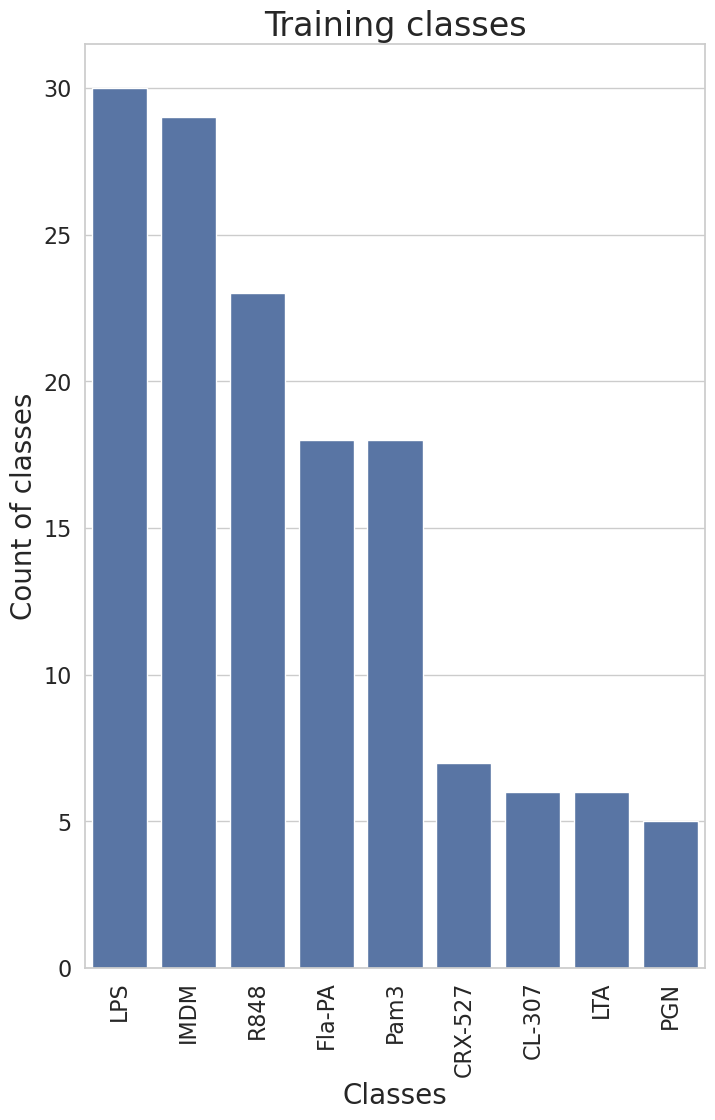

In [ ]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(8, 12))
sns.set_style(style="whitegrid", rc={"xtick.labelsize": 20, "ytick.labelsize": 20})
ax = sns.barplot(
    x=data_for_ml_all["class"].value_counts().index,
    y=data_for_ml_all["class"].value_counts(),
)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.xticks(rotation="vertical")


plt.title("Training classes", fontsize=24)
plt.xlabel("Classes", fontsize=20)  # X-axis label size
plt.ylabel("Count of classes", fontsize=20)  # Y-axis label size
plt.xticks(fontsize=16)  # X-axis tick label size
plt.yticks(fontsize=16)  # Y-axis tick label size

# Save the figure with proportional text sizes
plt.savefig("all_training_classes.png", bbox_inches="tight")

In [ ]:
data_for_ml_all = data_for_ml_all.loc[data_for_ml_all["class"] != "Fla-St"]

In [ ]:
len(data_for_ml_all)

142

In [ ]:
data_for_ml_all.to_csv("gene_counts_all_filtered.csv", index=True)